# Grab Computer Vision Challenge

Car image classification using fastai library. Dataset from https://ai.stanford.edu/~jkrause/cars/car_dataset.html

## 1. Data exploration

In [1]:
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
train_folder = 'datasets/stanford-cars/cars_train/'
devkit_folder = 'datasets/stanford-cars/devkit/'
base_folder = 'datasets/stanford-cars/'

In [4]:
!ls datasets/stanford-cars/cars_train

00001.jpg  01165.jpg  02329.jpg  03493.jpg  04657.jpg  05821.jpg  06985.jpg
00002.jpg  01166.jpg  02330.jpg  03494.jpg  04658.jpg  05822.jpg  06986.jpg
00003.jpg  01167.jpg  02331.jpg  03495.jpg  04659.jpg  05823.jpg  06987.jpg
00004.jpg  01168.jpg  02332.jpg  03496.jpg  04660.jpg  05824.jpg  06988.jpg
00005.jpg  01169.jpg  02333.jpg  03497.jpg  04661.jpg  05825.jpg  06989.jpg
00006.jpg  01170.jpg  02334.jpg  03498.jpg  04662.jpg  05826.jpg  06990.jpg
00007.jpg  01171.jpg  02335.jpg  03499.jpg  04663.jpg  05827.jpg  06991.jpg
00008.jpg  01172.jpg  02336.jpg  03500.jpg  04664.jpg  05828.jpg  06992.jpg
00009.jpg  01173.jpg  02337.jpg  03501.jpg  04665.jpg  05829.jpg  06993.jpg
00010.jpg  01174.jpg  02338.jpg  03502.jpg  04666.jpg  05830.jpg  06994.jpg
00011.jpg  01175.jpg  02339.jpg  03503.jpg  04667.jpg  05831.jpg  06995.jpg
00012.jpg  01176.jpg  02340.jpg  03504.jpg  04668.jpg  05832.jpg  06996.jpg
00013.jpg  01177.jpg  02341.jpg  03505.jpg  04669.jpg  05833.jpg  06997.jpg
00014.jpg  0

In [21]:
from PIL import Image

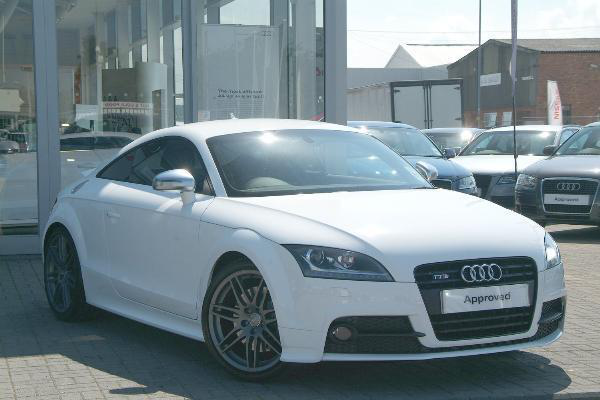

In [6]:
Image.open('{}/00001.jpg'.format(train_folder))

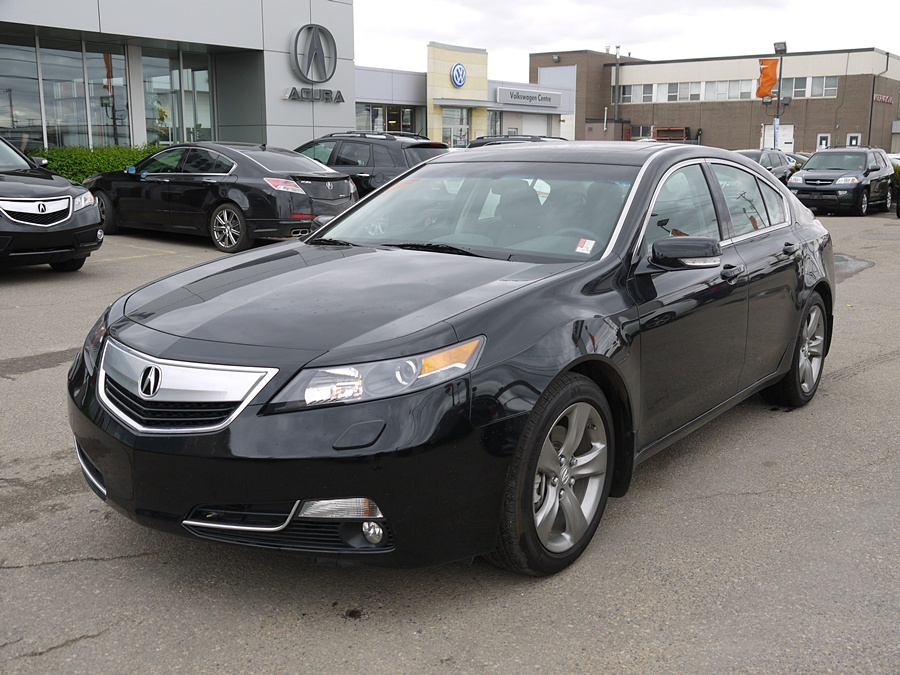

In [7]:
Image.open('{}/00002.jpg'.format(train_folder))

- Check image size distribution

In [8]:
from glob import glob

In [9]:
x, y = [], []
for f in glob('{}/*'.format(train_folder)):
    im = Image.open(f)
    x.append(im.size[0])
    y.append(im.size[1])

In [10]:
import matplotlib.pyplot as plt

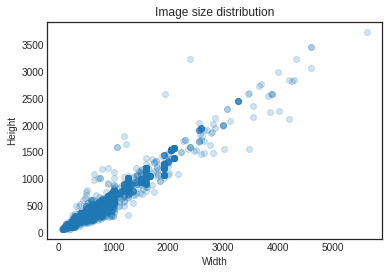

In [11]:
plt.style.use('seaborn-white')
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Image size distribution')
plt.scatter(x, y, alpha=0.2)

(array([[1.588e+03, 4.100e+01, 1.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [1.190e+02, 2.036e+03, 2.700e+02, 3.000e+00, ..., 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [5.000e+00, 3.260e+02, 1.953e+03, 2.000e+01, ..., 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [0.000e+00, 1.300e+01, 8.500e+01, 7.600e+02, ..., 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        ...,
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]]),
 array([  78. ,  354.9,  631.8,  908.7, 1185.6, 1462.5, 1739.4, 2016.3, 2293.2, 2570.1, 2847. , 3123.9, 3400.8, 3677.7,
        3954.6, 4231.5, 4508.4, 4785.3, 5

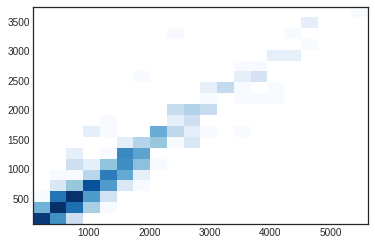

In [12]:
from matplotlib.colors import LogNorm
plt.hist2d(x, y, bins=20, norm=LogNorm(), cmap=plt.get_cmap('Blues'))

We can see that most of the images are < 2000px in width, and < 1500px in height

### Format annotation and metadata to Pandas Dataframe

In [13]:
import scipy.io as sio 

In [14]:
car_train_annos_mat = sio.loadmat('{}/cars_train_annos.mat'.format(devkit_folder))
cars_meta_mat = sio.loadmat('{}/cars_meta.mat'.format(devkit_folder))

In [15]:
car_train_annos_mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Dec 14 14:13:07 2013',
 '__version__': '1.0',
 '__globals__': [],
 'annotations': array([[(array([[39]], dtype=uint8), array([[116]], dtype=uint8), array([[569]], dtype=uint16), array([[375]], dtype=uint16), array([[14]], dtype=uint8), array(['00001.jpg'], dtype='<U9')),
         (array([[36]], dtype=uint8), array([[116]], dtype=uint8), array([[868]], dtype=uint16), array([[587]], dtype=uint16), array([[3]], dtype=uint8), array(['00002.jpg'], dtype='<U9')),
         (array([[85]], dtype=uint8), array([[109]], dtype=uint8), array([[601]], dtype=uint16), array([[381]], dtype=uint16), array([[91]], dtype=uint8), array(['00003.jpg'], dtype='<U9')),
         (array([[621]], dtype=uint16), array([[393]], dtype=uint16), array([[1484]], dtype=uint16), array([[1096]], dtype=uint16), array([[134]], dtype=uint8), array(['00004.jpg'], dtype='<U9')),
         ...,
         (array([[138]], dtype=uint8), array([[150]], dtype=uin

In [16]:
cars_meta_mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Dec 14 14:13:07 2013',
 '__version__': '1.0',
 '__globals__': [],
 'class_names': array([[array(['AM General Hummer SUV 2000'], dtype='<U26'), array(['Acura RL Sedan 2012'], dtype='<U19'),
         array(['Acura TL Sedan 2012'], dtype='<U19'), array(['Acura TL Type-S 2008'], dtype='<U20'), ...,
         array(['Volvo C30 Hatchback 2012'], dtype='<U24'), array(['Volvo 240 Sedan 1993'], dtype='<U20'),
         array(['Volvo XC90 SUV 2007'], dtype='<U19'), array(['smart fortwo Convertible 2012'], dtype='<U29')]],
       dtype=object)}

In [17]:
car_train_annos = car_train_annos_mat['annotations'][0]
len(car_train_annos)

8144

In [18]:
car_meta = cars_meta_mat['class_names'][0]
len(car_meta)

196

So we know there are 8144 training images, and 196 different car classes (which is same as mentioned in the dataset website)

In [19]:
car_id_to_car_class = {
    (idx + 1): meta[0]
    for idx, meta in enumerate(car_meta)
}

In [20]:
car_id_to_car_class

{1: 'AM General Hummer SUV 2000',
 2: 'Acura RL Sedan 2012',
 3: 'Acura TL Sedan 2012',
 4: 'Acura TL Type-S 2008',
 5: 'Acura TSX Sedan 2012',
 6: 'Acura Integra Type R 2001',
 7: 'Acura ZDX Hatchback 2012',
 8: 'Aston Martin V8 Vantage Convertible 2012',
 9: 'Aston Martin V8 Vantage Coupe 2012',
 10: 'Aston Martin Virage Convertible 2012',
 11: 'Aston Martin Virage Coupe 2012',
 12: 'Audi RS 4 Convertible 2008',
 13: 'Audi A5 Coupe 2012',
 14: 'Audi TTS Coupe 2012',
 15: 'Audi R8 Coupe 2012',
 16: 'Audi V8 Sedan 1994',
 17: 'Audi 100 Sedan 1994',
 18: 'Audi 100 Wagon 1994',
 19: 'Audi TT Hatchback 2011',
 20: 'Audi S6 Sedan 2011',
 21: 'Audi S5 Convertible 2012',
 22: 'Audi S5 Coupe 2012',
 23: 'Audi S4 Sedan 2012',
 24: 'Audi S4 Sedan 2007',
 25: 'Audi TT RS Coupe 2012',
 26: 'BMW ActiveHybrid 5 Sedan 2012',
 27: 'BMW 1 Series Convertible 2012',
 28: 'BMW 1 Series Coupe 2012',
 29: 'BMW 3 Series Sedan 2012',
 30: 'BMW 3 Series Wagon 2012',
 31: 'BMW 6 Series Convertible 2007',
 32: 

In [21]:
car_train_annos[0]

(array([[39]], dtype=uint8), array([[116]], dtype=uint8), array([[569]], dtype=uint16), array([[375]], dtype=uint16), array([[14]], dtype=uint8), array(['00001.jpg'], dtype='<U9'))

In [22]:
import pandas as pd
train_df = pd.DataFrame(
    data=[
        [
            ann_bbox_x1[0][0],
            ann_bbox_y1[0][0],
            ann_bbox_x2[0][0],
            ann_bbox_y2[0][0],
            ann_class[0][0],
            ann_fname[0]
        ] for ann_bbox_x1, ann_bbox_y1, ann_bbox_x2, ann_bbox_y2, ann_class, ann_fname in car_train_annos
    ],
    columns=['bbox_x1', 'bbox_y1', 'bbox_x2', 'bbox_y2', 'class', 'fname']
)

In [23]:
train_df.head()

,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class,fname
0,39,116,569,375,14,00001.jpg
1,36,116,868,587,3,00002.jpg
2,85,109,601,381,91,00003.jpg
3,621,393,1484,1096,134,00004.jpg
4,14,36,133,99,106,00005.jpg


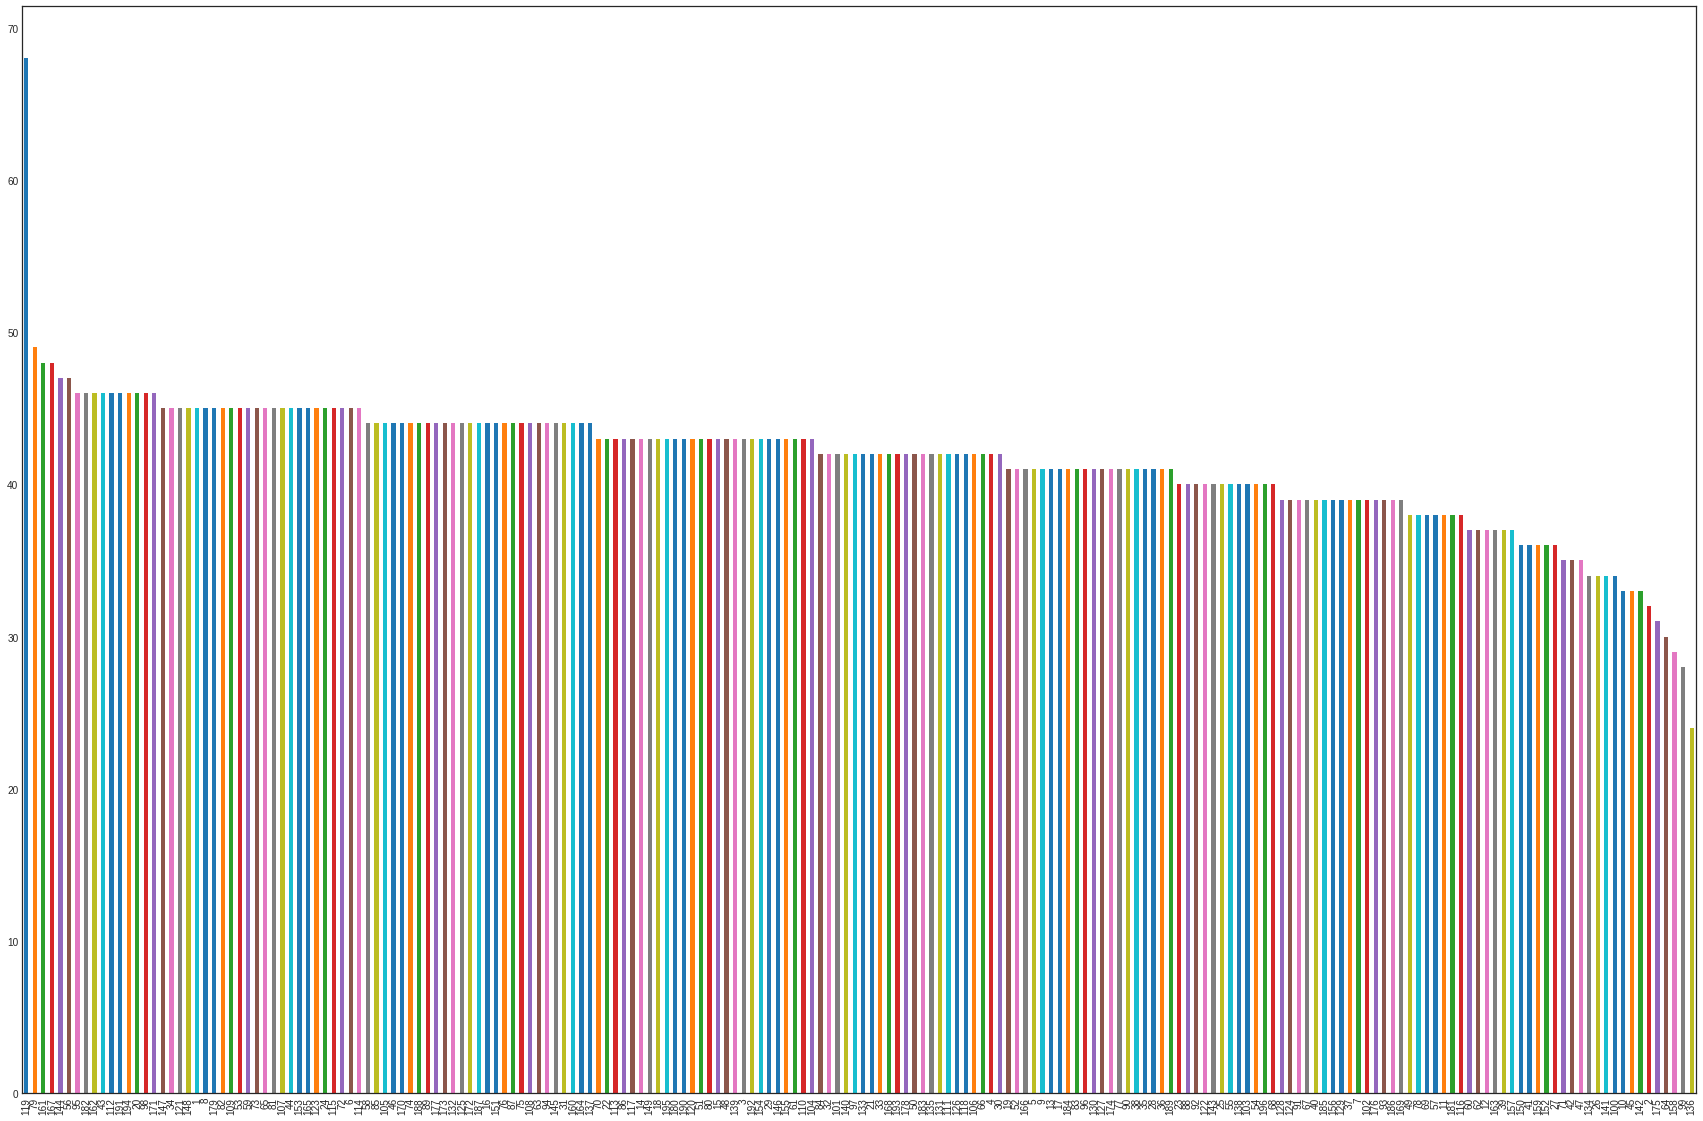

In [24]:
train_df['class'].value_counts().plot(kind='bar', figsize=(30, 20))

In [25]:
car_id_to_car_class[119]

'GMC Savana Van 2012'

In [26]:
car_id_to_car_class[136]

'Hyundai Accent Sedan 2012'

Most of the cars' image are evenly distributed. GMC Savana Van 2012 has around 20 images more than average and Hyndai Accent Sedan 2012 has around 10-20 images less than average.

In [27]:
train_df['class_name'] = train_df['class'].map(car_id_to_car_class)

In [28]:
train_df.head()

,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class,fname,class_name
0,39,116,569,375,14,00001.jpg,Audi TTS Coupe 2012
1,36,116,868,587,3,00002.jpg,Acura TL Sedan 2012
2,85,109,601,381,91,00003.jpg,Dodge Dakota Club Cab 2007
3,621,393,1484,1096,134,00004.jpg,Hyundai Sonata Hybrid Sedan 2012
4,14,36,133,99,106,00005.jpg,Ford F-450 Super Duty Crew Cab 2012


Save the formatted dataframe for future use

In [29]:
train_df.to_csv('{}/train_df.csv'.format(base_folder), index=False)

## 2. Model Training

### Create ImageDataBunch from Pandas dataframe

start with image size 224 and batch size of 64

In [4]:
BATCH_SIZE = 64
IMG_SIZE = 224

In [5]:
train_df = pd.read_csv('{}/train_df.csv'.format(base_folder))

In [7]:
data = ImageDataBunch.from_df(
    train_folder,
    df=train_df,
    fn_col='fname',
    label_col='class_name',
    size=IMG_SIZE,
    bs=BATCH_SIZE,
    ds_tfms=get_transforms()
).normalize(imagenet_stats)

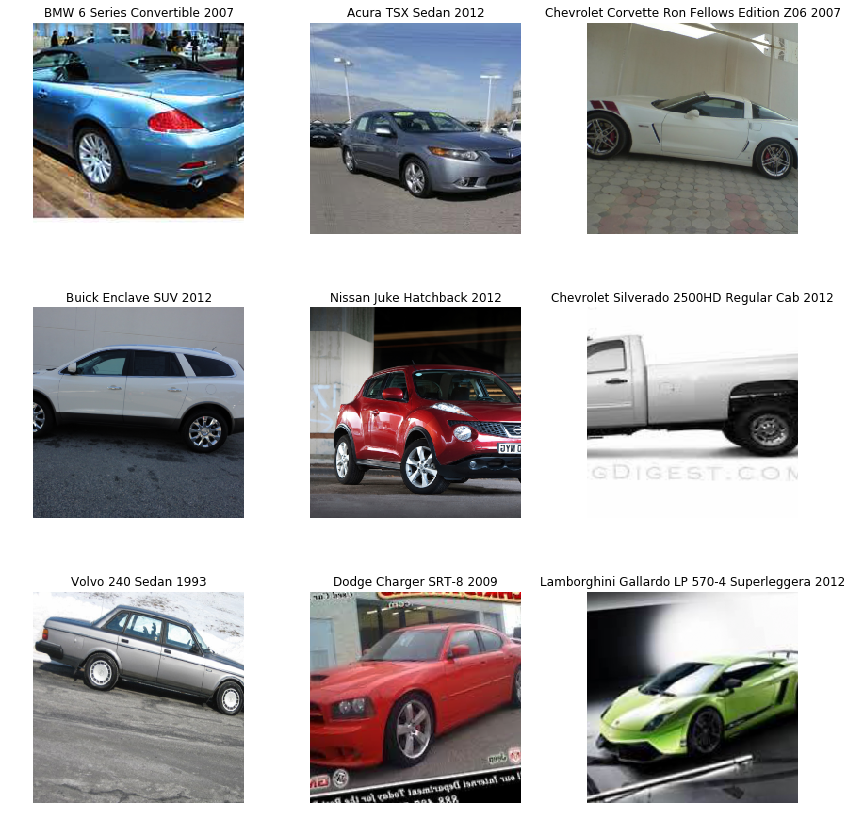

In [8]:
data.show_batch(rows=3)

### Setup a CNN learner with pretrained model

Start from smaller architecture, smaller image size to kick start.

### Resnet34

In [37]:
learner = cnn_learner(data, base_arch=models.resnet34, metrics=[accuracy], path=base_folder)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


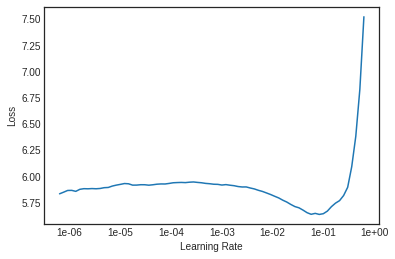

In [38]:
learner.lr_find()
learner.recorder.plot()

In [39]:
learner.fit_one_cycle(5, max_lr=3e-2)

epoch,train_loss,valid_loss,accuracy,time
0,4.591267,4.680739,0.085381,00:44
1,4.131515,3.720807,0.148034,00:44
2,3.544318,3.187693,0.219902,00:43
3,2.715339,1.922212,0.494472,00:45
4,2.053585,1.679229,0.565111,00:44


In [40]:
learner.save('resnet34-img-244-freeze-1')

Saving model in the following format: {arch}-img-{img_size}-{freeze/unfreeze}-{number}. 

Training loss and validation loss is decreasing, can continue to train.

In [41]:
learner.fit_one_cycle(10, max_lr=3e-2)

epoch,train_loss,valid_loss,accuracy,time
0,1.845833,1.745649,0.514742,00:45
1,2.493628,3.446994,0.242015,00:43
2,3.127134,3.367311,0.236486,00:44
3,3.239847,3.593279,0.228501,00:44


Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/fastai/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/home/ubuntu/anaconda3/envs/fastai/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/home/ubuntu/anaconda3/envs/fastai/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/home/ubuntu/anaconda3/envs/fastai/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/fastai/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/home/ubuntu/anaconda3/envs/fastai/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/home/ubuntu/anaconda3/envs/fast

KeyboardInterrupt: 

Looks like the model couldn't converge, reload the previous trained weight

In [42]:
learner.load('resnet34-img-244-freeze-1')

Learner(data=ImageDataBunch;

Train: LabelList (6516 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Acura TL Sedan 2012,Dodge Dakota Club Cab 2007,Hyundai Sonata Hybrid Sedan 2012,Geo Metro Convertible 1993,Dodge Journey SUV 2012
Path: datasets/stanford-cars/cars_train;

Valid: LabelList (1628 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Ford Expedition EL SUV 2009,Audi RS 4 Convertible 2008,AM General Hummer SUV 2000,Volkswagen Golf Hatchback 2012,Dodge Charger Sedan 2012
Path: datasets/stanford-cars/cars_train;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


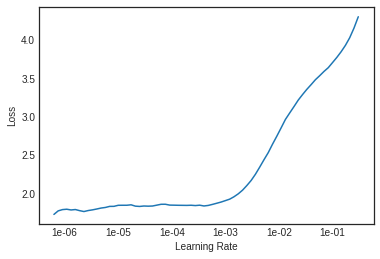

In [43]:
learner.unfreeze()
learner.lr_find()
learner.recorder.plot()

In [44]:
learner.fit_one_cycle(5, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,1.835278,1.642948,0.570025,00:56
1,1.791600,1.587182,0.580467,00:56
2,1.746559,1.540225,0.585995,00:56
3,1.632667,1.515206,0.590909,00:56
4,1.622342,1.511222,0.598894,00:57


In [45]:
learner.save('resnet34-img-244-unfreeze-1')

In [46]:
learner.fit_one_cycle(10, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,1.607369,1.507010,0.593366,00:55
1,1.606230,1.497809,0.603194,00:56
2,1.600616,1.462070,0.607494,00:57
3,1.555707,1.423762,0.617322,00:57
4,1.525922,1.387220,0.624079,00:56
5,1.421648,1.370205,0.625307,00:56
6,1.404971,1.354869,0.633907,00:55
7,1.373882,1.344685,0.639435,00:56
8,1.364813,1.340931,0.643120,00:56
9,1.374942,1.340479,0.638821,00:56


In [47]:
learner.save('resnet34-img-244-unfreeze-2')

### Resnet50

In [7]:
learner_50 = cnn_learner(data, base_arch=models.resnet50, metrics=[accuracy], path=base_folder)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


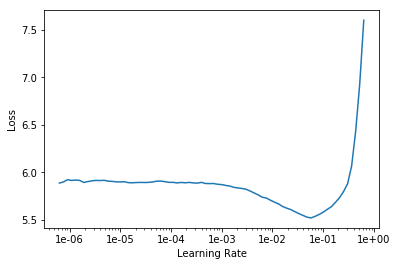

In [15]:
learner_50.lr_find()
learner_50.recorder.plot()

In [16]:
learner_50.fit_one_cycle(5, max_lr=3e-2)

epoch,train_loss,valid_loss,accuracy,time
0,4.494600,11.054380,0.026413,01:26
1,4.081144,4.540936,0.120393,01:24
2,3.402887,3.044590,0.253071,01:23
3,2.522462,1.851654,0.476658,01:24
4,1.814188,1.422812,0.611179,01:24


In [17]:
learner_50.save('resnet50-img-244-freeze-1')

In [8]:
learner_50.load('resnet50-img-244-freeze-1')

Learner(data=ImageDataBunch;

Train: LabelList (6516 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Audi TTS Coupe 2012,Acura TL Sedan 2012,Ford F-450 Super Duty Crew Cab 2012,Geo Metro Convertible 1993,Dodge Charger Sedan 2012
Path: datasets/stanford-cars/cars_train;

Valid: LabelList (1628 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Jeep Compass SUV 2012,Dodge Dakota Club Cab 2007,Volvo XC90 SUV 2007,Dodge Challenger SRT8 2011,Tesla Model S Sedan 2012
Path: datasets/stanford-cars/cars_train;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


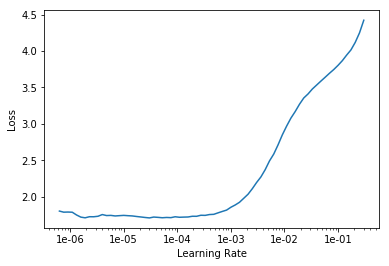

In [9]:
learner_50.unfreeze()
learner_50.lr_find()
learner_50.recorder.plot()

In [10]:
learner_50.fit_one_cycle(5, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,1.603535,1.013955,0.743858,01:48
1,1.612540,1.000347,0.749386,01:46
2,1.516677,0.970435,0.753685,01:46
3,1.471422,0.955377,0.759214,01:46
4,1.426980,0.951586,0.757985,01:47


In [11]:
learner_50.save('resnet50-img-244-unfreeze-1')

In [12]:
learner_50.fit_one_cycle(10, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,1.444608,0.946733,0.759214,01:47
1,1.412908,0.940219,0.767199,01:45
2,1.393708,0.929508,0.765356,01:47
3,1.338389,0.923539,0.757985,01:45
4,1.301566,0.896765,0.774570,01:46
5,1.249250,0.888366,0.769042,01:46
6,1.213757,0.872604,0.772113,01:46
7,1.204851,0.865431,0.776413,01:46
8,1.181284,0.860534,0.781941,01:47
9,1.173609,0.858115,0.777027,01:46


In [13]:
learner_50.save('resnet50-img-244-unfreeze-2')

### Resnet101

In [16]:
del learner_50
torch.cuda.empty_cache()

In [17]:
data.batch_size = BATCH_SIZE // 2

In [18]:
learner_101 = cnn_learner(data, base_arch=models.resnet101, metrics=[accuracy], path=base_folder)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


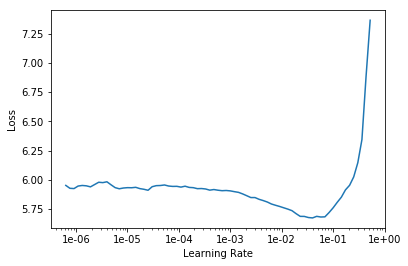

In [19]:
learner_101.lr_find()
learner_101.recorder.plot()

In [ ]:
learner_101.fit_one_cycle(5, max_lr=3e-2)

epoch,train_loss,valid_loss,accuracy,time
0,4.904037,5.487354,0.041769,02:09
1,4.809840,5.410611,0.037469,02:09
2,4.313792,15.249062,0.042383,02:08
3,3.368345,3.082030,0.309582,02:09


In [ ]:
learner_101.save('resnet101-img-244-unfreeze-1')

### Resnet152

In [14]:
torch.cuda.empty_cache()

In [15]:
data.batch_size = BATCH_SIZE // 4

In [16]:
data.batch_size

16

In [17]:
learner_152 = cnn_learner(data, base_arch=models.resnet152, metrics=[accuracy], path=base_folder)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


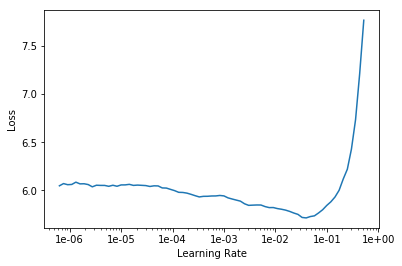

In [18]:
learner_152.lr_find()
learner_152.recorder.plot()

In [19]:
# tried with 3e-2 learning rate but not converging.. use a lower one
learner_152.fit_one_cycle(5, max_lr=1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,4.661160,5.185897,0.062654,03:13
1,4.126626,3.888719,0.137592,03:11
2,3.379647,2.831584,0.299140,03:11
3,2.282132,1.780105,0.527641,03:11
4,1.813550,1.460892,0.632678,03:10


In [20]:
learner_152.save('resnet152-img-244-unfreeze-1')

In [21]:
learner_152.fit_one_cycle(5, max_lr=1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,2.437137,2.337527,0.423833,03:11
1,2.847642,2.531175,0.353808,03:10
2,2.493890,1.913943,0.513514,03:10
3,1.761050,1.275773,0.668919,03:10
4,1.392404,1.155661,0.679975,03:11


Resnet50 seems to have a good balance between training time and accuracy.. let's focus on the architecture for now.

## 3. Progressive resizing

We can train on larger image using the trained model weights, that brings 2 benefits:
1. Since we are training on higher resolution, we can get a better trained model with higher accuracy
2. The model will be generalized better

Since we know the distribution of the image sizes are generally <2000px in width and 1500px in height, we can safely increase the image sizes to feed into our model

In [42]:
torch.cuda.empty_cache()

In [4]:
train_df = pd.read_csv('{}/train_df.csv'.format(base_folder))
IMG_SIZE = 299
BATCH_SIZE = 32

In [5]:
data_299 = ImageDataBunch.from_df(
    train_folder,
    df=train_df,
    fn_col='fname',
    label_col='class_name',
    size=IMG_SIZE,
    bs=BATCH_SIZE,
    ds_tfms=get_transforms()
).normalize(imagenet_stats)

In [6]:
data_299.train_ds[0]

(Image (3, 299, 299), Category Acura TL Sedan 2012)

In [7]:
learner_50 = cnn_learner(data_299, base_arch=models.resnet50, metrics=[accuracy], path=base_folder)

In [8]:
learner_50.load('resnet50-img-244-unfreeze-2')

Learner(data=ImageDataBunch;

Train: LabelList (6516 items)
x: ImageList
Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299)
y: CategoryList
Acura TL Sedan 2012,Hyundai Sonata Hybrid Sedan 2012,Ford F-450 Super Duty Crew Cab 2012,Geo Metro Convertible 1993,Dodge Journey SUV 2012
Path: datasets/stanford-cars/cars_train;

Valid: LabelList (1628 items)
x: ImageList
Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299)
y: CategoryList
Acura Integra Type R 2001,Bugatti Veyron 16.4 Convertible 2009,Bugatti Veyron 16.4 Coupe 2009,BMW X5 SUV 2007,McLaren MP4-12C Coupe 2012
Path: datasets/stanford-cars/cars_train;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, p

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


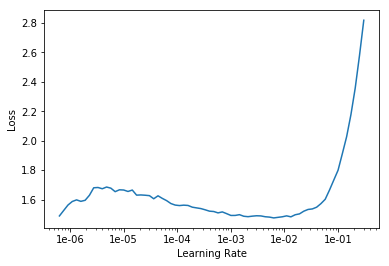

In [9]:
learner_50.lr_find()
learner_50.recorder.plot()

In [11]:
learner_50.fit_one_cycle(5, max_lr=1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.428157,0.666272,0.837838,02:34
1,1.262896,0.629133,0.831695,02:30
2,1.166264,0.592393,0.840909,02:30
3,1.041851,0.555066,0.851966,02:30
4,0.982782,0.554037,0.855037,02:30


In [12]:
learner_50.save('resnet50-img-299-freeze-1')

In [13]:
# train more!
learner_50.fit_one_cycle(10, max_lr=1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.958767,0.546936,0.855651,02:31
1,0.985961,0.558994,0.836609,02:30
2,0.985982,0.549392,0.840909,02:31
3,0.899073,0.538373,0.842752,02:30
4,0.857108,0.519180,0.850737,02:30
5,0.836755,0.509107,0.848280,02:30
6,0.741396,0.507016,0.857494,02:30
7,0.702046,0.493123,0.863636,02:30
8,0.701587,0.487011,0.861794,02:31
9,0.679173,0.487164,0.863022,02:30


Unfreeze the model and train

In [17]:
learner_50.freeze()
learner_50.save('resnet50-img-299-freeze-2')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


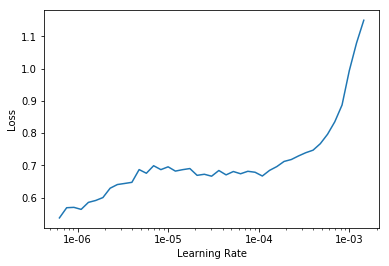

In [14]:
learner_50.unfreeze()
learner_50.lr_find()
learner_50.recorder.plot()

In [20]:
learner_50.unfreeze()

In [21]:
learner_50.fit_one_cycle(3, max_lr=slice(5e-6, 5e-5))

epoch,train_loss,valid_loss,accuracy,time
0,0.700236,0.515258,0.853808,03:11
1,0.699681,0.488747,0.852580,03:11
2,0.602577,0.472207,0.865479,03:12


In [22]:
learner_50.fit_one_cycle(5, max_lr=slice(5e-6, 5e-5))

epoch,train_loss,valid_loss,accuracy,time
0,0.618510,0.486036,0.854423,03:12
1,0.659605,0.506868,0.848894,03:11
2,0.593690,0.473103,0.865479,03:12
3,0.541217,0.462797,0.867936,03:11
4,0.504056,0.457523,0.864865,03:12


In [23]:
learner_50.save('resnet50-img-299-unfreeze-1')

try to train with larger image!

In [5]:
IMG_SIZE = 480
BATCH_SIZE = 16

In [6]:
data_480 = ImageDataBunch.from_df(
    train_folder,
    df=train_df,
    fn_col='fname',
    label_col='class_name',
    size=IMG_SIZE,
    bs=BATCH_SIZE,
    ds_tfms=get_transforms()
).normalize(imagenet_stats)

In [7]:
learner_50 = cnn_learner(data_480, base_arch=models.resnet50, metrics=[accuracy], path=base_folder)

In [30]:
learner_50.load('resnet50-img-299-unfreeze-1')

Learner(data=ImageDataBunch;

Train: LabelList (6516 items)
x: ImageList
Image (3, 480, 480),Image (3, 480, 480),Image (3, 480, 480),Image (3, 480, 480),Image (3, 480, 480)
y: CategoryList
Acura TL Sedan 2012,Dodge Dakota Club Cab 2007,Ford F-450 Super Duty Crew Cab 2012,Geo Metro Convertible 1993,Dodge Journey SUV 2012
Path: datasets/stanford-cars/cars_train;

Valid: LabelList (1628 items)
x: ImageList
Image (3, 480, 480),Image (3, 480, 480),Image (3, 480, 480),Image (3, 480, 480),Image (3, 480, 480)
y: CategoryList
Lamborghini Aventador Coupe 2012,Audi S5 Convertible 2012,Nissan 240SX Coupe 1998,Dodge Challenger SRT8 2011,BMW 1 Series Coupe 2012
Path: datasets/stanford-cars/cars_train;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, 

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


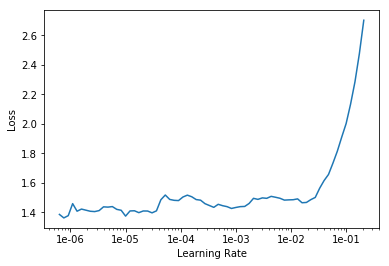

In [32]:
learner_50.lr_find()
learner_50.recorder.plot()

In [33]:
learner_50.fit_one_cycle(5, max_lr=1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.229197,0.479972,0.877764,05:54
1,1.013829,0.442370,0.894349,05:49
2,0.917288,0.407560,0.892506,05:49
3,0.808637,0.381839,0.901720,05:49
4,0.756829,0.371984,0.905405,05:49


In [34]:
learner_50.save('resnet50-img-480-freeze-1')

In [8]:
learner_50.load('resnet50-img-480-freeze-1')

Learner(data=ImageDataBunch;

Train: LabelList (6516 items)
x: ImageList
Image (3, 480, 480),Image (3, 480, 480),Image (3, 480, 480),Image (3, 480, 480),Image (3, 480, 480)
y: CategoryList
Audi TTS Coupe 2012,Acura TL Sedan 2012,Dodge Dakota Club Cab 2007,Ford F-450 Super Duty Crew Cab 2012,Geo Metro Convertible 1993
Path: datasets/stanford-cars/cars_train;

Valid: LabelList (1628 items)
x: ImageList
Image (3, 480, 480),Image (3, 480, 480),Image (3, 480, 480),Image (3, 480, 480),Image (3, 480, 480)
y: CategoryList
Hyundai Sonata Sedan 2012,Dodge Durango SUV 2012,Land Rover Range Rover SUV 2012,Jeep Liberty SUV 2012,Chevrolet Avalanche Crew Cab 2012
Path: datasets/stanford-cars/cars_train;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1,

In [9]:
learner_50.fit_one_cycle(10, max_lr=1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.806179,0.241944,0.940418,05:59
1,0.707502,0.278128,0.918919,05:49
2,0.805807,0.313828,0.918305,05:49
3,0.745634,0.329140,0.899263,05:49
4,0.673301,0.325296,0.907862,05:50
5,0.598023,0.306790,0.908477,05:50
6,0.613483,0.302572,0.909705,05:49
7,0.546134,0.299827,0.910934,05:50
8,0.480455,0.294055,0.909705,05:49
9,0.449064,0.289415,0.912776,05:49


In [10]:
learner_50.save('resnet50-img-480-freeze-2')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


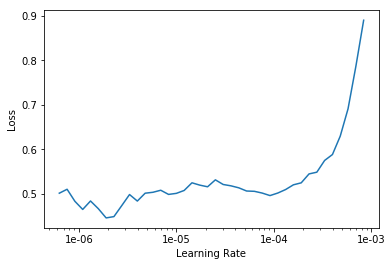

In [11]:
learner_50.unfreeze()
learner_50.lr_find()
learner_50.recorder.plot()

In [12]:
learner_50.fit_one_cycle(5, max_lr=slice(1e-6, 1e-5))

epoch,train_loss,valid_loss,accuracy,time
0,0.418676,0.300440,0.912776,07:29
1,0.468804,0.291161,0.915233,07:30
2,0.477741,0.293073,0.910934,07:29
3,0.418845,0.283199,0.913391,07:29
4,0.397748,0.286558,0.913391,07:29


In [13]:
learner_50.save('resnet50-img-480-unfreeze-1')

## 4. Train on rectangular image

Lets see if we can train in rectangular format and whether the model accuracy improved, since most car images are rectangular in general

In [16]:
torch.cuda.empty_cache()

In [17]:
train_df = pd.read_csv('{}/train_df.csv'.format(base_folder))
IMG_SIZE = 544
BATCH_SIZE = 8

In [19]:
train_df.head()

,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class,fname,class_name
0,39,116,569,375,14,00001.jpg,Audi TTS Coupe 2012
1,36,116,868,587,3,00002.jpg,Acura TL Sedan 2012
2,85,109,601,381,91,00003.jpg,Dodge Dakota Club Cab 2007
3,621,393,1484,1096,134,00004.jpg,Hyundai Sonata Hybrid Sedan 2012
4,14,36,133,99,106,00005.jpg,Ford F-450 Super Duty Crew Cab 2012


In [22]:
for idx, row in train_df.iterrows():
    im = Image.open('{}/{}'.format(train_folder, row['fname']))
    train_df.loc[idx, 'width'] = im.size[0]
    train_df.loc[idx, 'height'] = im.size[1]
    train_df.loc[idx, 'aspect_ratio'] = im.size[0] * 1.0 / im.size[1]

In [23]:
train_df.head()

,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class,fname,class_name,width,height,aspect_ratio
0,39,116,569,375,14,00001.jpg,Audi TTS Coupe 2012,600.0,400.0,1.500000
1,36,116,868,587,3,00002.jpg,Acura TL Sedan 2012,900.0,675.0,1.333333
2,85,109,601,381,91,00003.jpg,Dodge Dakota Club Cab 2007,640.0,480.0,1.333333
3,621,393,1484,1096,134,00004.jpg,Hyundai Sonata Hybrid Sedan 2012,2100.0,1386.0,1.515152
4,14,36,133,99,106,00005.jpg,Ford F-450 Super Duty Crew Cab 2012,144.0,108.0,1.333333


In [24]:
train_df.to_csv('{}/train_df_with_aspect_ratio.csv'.format(base_folder), index=False)

(array([2.400e+01, 2.180e+02, 6.060e+03, 1.438e+03, 2.710e+02, 8.200e+01, 3.200e+01, 1.600e+01, 2.000e+00, 1.000e+00]),
 array([0.593066, 0.922513, 1.25196 , 1.581407, 1.910855, 2.240302, 2.569749, 2.899196, 3.228644, 3.558091, 3.887538]),
 <a list of 10 Patch objects>)

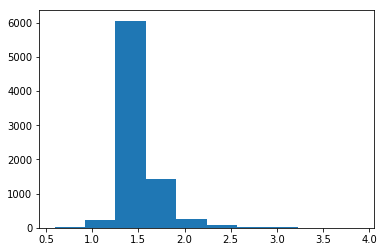

In [25]:
plt.hist(train_df['aspect_ratio'], bins=10)

Most aspect ratio are around 1.5

In [4]:
train_df = pd.read_csv('{}/train_df_with_aspect_ratio.csv'.format(base_folder))

In [6]:
IMG_SIZE = (400, 600)
BATCH_SIZE = 4

In [7]:
data_rect = ImageDataBunch.from_df(
    train_folder,
    df=train_df,
    fn_col='fname',
    label_col='class_name',
    size=IMG_SIZE,
    bs=BATCH_SIZE,
    ds_tfms=get_transforms()
).normalize(imagenet_stats)

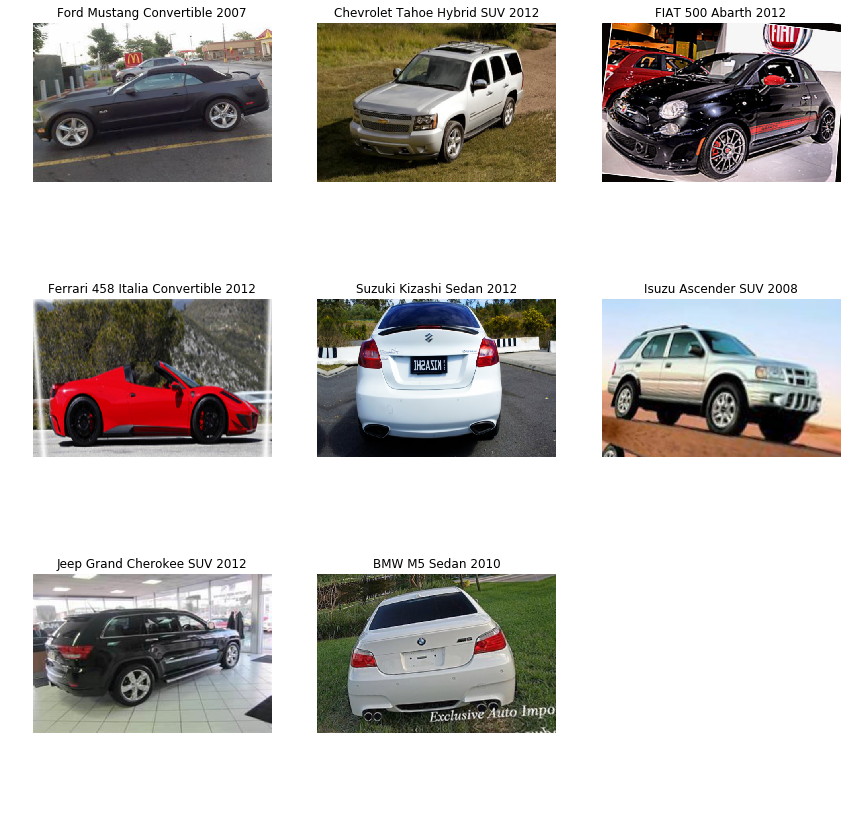

In [29]:
data_rect.show_batch(3)

In [31]:
data_rect.train_ds[1]

(Image (3, 400, 600), Category Ford F-450 Super Duty Crew Cab 2012)

In [8]:
learner_50 = cnn_learner(data_rect, base_arch=models.resnet50, metrics=[accuracy], path=base_folder)

In [36]:
learner_50.load('resnet50-img-480-unfreeze-1')

Learner(data=ImageDataBunch;

Train: LabelList (6516 items)
x: ImageList
Image (3, 400, 600),Image (3, 400, 600),Image (3, 400, 600),Image (3, 400, 600),Image (3, 400, 600)
y: CategoryList
Hyundai Sonata Hybrid Sedan 2012,Ford F-450 Super Duty Crew Cab 2012,Geo Metro Convertible 1993,Dodge Journey SUV 2012,Dodge Charger Sedan 2012
Path: datasets/stanford-cars/cars_train;

Valid: LabelList (1628 items)
x: ImageList
Image (3, 400, 600),Image (3, 400, 600),Image (3, 400, 600),Image (3, 400, 600),Image (3, 400, 600)
y: CategoryList
Jeep Liberty SUV 2012,Audi 100 Wagon 1994,Audi TTS Coupe 2012,Rolls-Royce Ghost Sedan 2012,Lamborghini Reventon Coupe 2008
Path: datasets/stanford-cars/cars_train;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1,

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


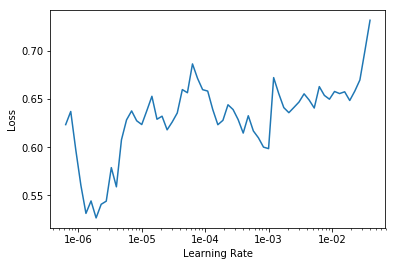

In [37]:
learner_50.lr_find()
learner_50.recorder.plot()

In [38]:
learner_50.fit_one_cycle(5, max_lr=1e-6)

epoch,train_loss,valid_loss,accuracy,time
0,0.610698,0.134501,0.966216,06:33
1,0.589545,0.134874,0.964373,06:31
2,0.627558,0.136563,0.962531,06:30
3,0.652653,0.134874,0.968059,06:31
4,0.673377,0.132067,0.967445,06:31


In [39]:
learner_50.save('resnet50-img-rect-400x600-freeze-1')

In [9]:
learner_50.load('resnet50-img-rect-400x600-freeze-1')

Learner(data=ImageDataBunch;

Train: LabelList (6516 items)
x: ImageList
Image (3, 400, 600),Image (3, 400, 600),Image (3, 400, 600),Image (3, 400, 600),Image (3, 400, 600)
y: CategoryList
Audi TTS Coupe 2012,Dodge Dakota Club Cab 2007,Hyundai Sonata Hybrid Sedan 2012,Geo Metro Convertible 1993,Dodge Charger Sedan 2012
Path: datasets/stanford-cars/cars_train;

Valid: LabelList (1628 items)
x: ImageList
Image (3, 400, 600),Image (3, 400, 600),Image (3, 400, 600),Image (3, 400, 600),Image (3, 400, 600)
y: CategoryList
Audi S4 Sedan 2007,Audi TTS Coupe 2012,Chevrolet Silverado 1500 Regular Cab 2012,Dodge Ram Pickup 3500 Quad Cab 2009,Chevrolet Silverado 1500 Classic Extended Cab 2007
Path: datasets/stanford-cars/cars_train;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(ke

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


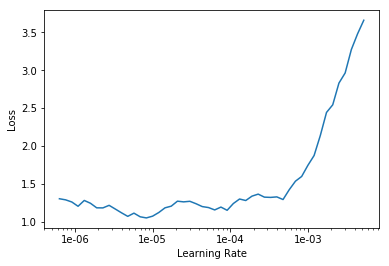

In [10]:
learner_50.unfreeze()
learner_50.lr_find()
learner_50.recorder.plot()

In [11]:
learner_50.fit_one_cycle(5, max_lr=slice(1e-6, 1e-5))

epoch,train_loss,valid_loss,accuracy,time
0,1.164699,0.130358,0.963145,08:58
1,1.151763,0.136145,0.964988,08:59
2,1.330052,0.126011,0.964988,08:58


KeyboardInterrupt: 

Training loss doesn't decrease. Don't bother with unfreezing

In [12]:
learner_50.load('resnet50-img-rect-400x600-freeze-1')

Learner(data=ImageDataBunch;

Train: LabelList (6516 items)
x: ImageList
Image (3, 400, 600),Image (3, 400, 600),Image (3, 400, 600),Image (3, 400, 600),Image (3, 400, 600)
y: CategoryList
Audi TTS Coupe 2012,Dodge Dakota Club Cab 2007,Hyundai Sonata Hybrid Sedan 2012,Geo Metro Convertible 1993,Dodge Charger Sedan 2012
Path: datasets/stanford-cars/cars_train;

Valid: LabelList (1628 items)
x: ImageList
Image (3, 400, 600),Image (3, 400, 600),Image (3, 400, 600),Image (3, 400, 600),Image (3, 400, 600)
y: CategoryList
Audi S4 Sedan 2007,Audi TTS Coupe 2012,Chevrolet Silverado 1500 Regular Cab 2012,Dodge Ram Pickup 3500 Quad Cab 2009,Chevrolet Silverado 1500 Classic Extended Cab 2007
Path: datasets/stanford-cars/cars_train;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(ke

In [13]:
learner_50.freeze()

In [ ]:
learner_50.fit_one_cycle(10, max_lr=1e-6)

epoch,train_loss,valid_loss,accuracy,time
0,1.321153,0.140949,0.961302,06:37
1,1.183658,0.137241,0.963759,06:37
2,1.334646,0.133369,0.966216,06:36
3,1.220279,0.132018,0.968059,06:37
4,1.291822,0.159914,0.953931,06:36
5,1.280752,0.127070,0.968059,06:36
6,1.145585,0.136506,0.962531,06:36
7,1.039814,0.128874,0.966216,06:37


In [ ]:
learner_50.save('resnet50-img-rect-400x600-freeze-2')

## 5. Predict on test set